# 17기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


필요한 모듈 불러오기

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 데이터 살펴보기 (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [8]:
#결측치 확인
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [21]:
#결측치 비율 확인
missing_value = df.isnull().sum()
percent = df.isnull().sum()/df.shape[0]*100

value = {
    "missing_values": missing_value,
    "percent_missing": percent
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,1533,30.672269


In [20]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [9]:
# Product_ID 빈도수 확인
df['Product_ID'].value_counts()

P00265242    21
P00220442    16
P00151742    15
P00145042    15
P00010742    15
             ..
P00138342     1
P00367342     1
P00259842     1
P00264242     1
P00362342     1
Name: Product_ID, Length: 1797, dtype: int64

In [10]:
# Gender 빈도수 확인
df['Gender'].value_counts()

M    3765
F    1233
Name: Gender, dtype: int64

In [11]:
# Age 빈도수 확인
df['Age'].value_counts()

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

In [12]:
# Occupation 빈도수 확인
df['Occupation'].value_counts()

4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64

In [13]:
# City_Category 빈도수 확인
df['City_Category'].value_counts()

B    2102
C    1555
A    1341
Name: City_Category, dtype: int64

In [14]:
# Stay_In_Current_City_Years 빈도수 확인
df['Stay_In_Current_City_Years'].value_counts()

1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
# Marital_Status 빈도수 확인
df['Marital_Status'].value_counts()

0    2892
1    2106
Name: Marital_Status, dtype: int64

In [16]:
# Product_Category_1 빈도수 확인
df['Product_Category_1'].value_counts()

5     1407
1     1285
8      995
2      227
11     206
3      193
6      193
4      107
16      78
15      57
13      43
10      41
7       40
20      31
12      31
19      20
14      19
18      18
17       6
9        1
Name: Product_Category_1, dtype: int64

In [17]:
# Product_Category_2 빈도수 확인
df['Product_Category_2'].value_counts()

8.0     588
14.0    496
2.0     448
16.0    392
15.0    345
5.0     258
4.0     246
6.0     148
17.0    132
11.0    110
13.0    102
9.0      65
12.0     40
3.0      35
10.0     30
18.0     23
7.0       7
Name: Product_Category_2, dtype: int64

In [18]:
# Product_Category_3 빈도수 확인
df['Product_Category_3'].value_counts()

16.0    318
15.0    260
14.0    162
17.0    146
5.0     140
8.0     116
9.0     105
12.0     96
13.0     50
6.0      44
18.0     44
10.0     23
11.0     22
4.0      17
3.0       1
Name: Product_Category_3, dtype: int64

In [19]:
# Purchase 빈도수 확인
df['Purchase'].value_counts()

5328     6
7001     6
7063     6
8115     6
6970     5
        ..
19543    1
11717    1
1784     1
5200     1
8192     1
Name: Purchase, Length: 3736, dtype: int64

### Preprocssing

1. 결측치 채우기
- 위의 코드에서 알 수 있듯이, Product_Category_3의 결측 비율은 약 70%이므로 제외하는 게 좋을 것이라 생각한다.
- Product_Category_2의 결측 비율은 약 30%로 대체가 좋을 것 같고, 대체값은 중앙값으로 사용할 것이다.

In [24]:
# 먼저, Product_Category_3 결측 제외
df = df.drop(columns=['Product_Category_3'])

In [25]:
# 한번 더 결측치 확인
missing_value = df.isnull().sum()
percent = df.isnull().sum()/df.shape[0]*100

value = {
    "missing_values": missing_value,
    "percent_missing": percent
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,1533,30.672269


In [26]:
#Product_Category_2의 결측값이 그대로 남아있으므로 결측치를 중앙값 대체
df["Product_Category_2"].fillna(df["Product_Category_2"].median(), inplace = True)

In [27]:
# 한번 더 결측치 확인
missing_value = df.isnull().sum()
percent = df.isnull().sum()/df.shape[0]*100

value = {
    "missing_values": missing_value,
    "percent_missing": percent
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


y : Purchase
x : Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2

- User_ID와 Purchase_ID는 인덱스의 역할을 한다고 생각하여 제외하였다.

In [29]:
df = df.drop(columns=['User_ID', 'Product_ID'])

In [33]:
# 데이터 프레임 형태로 변환
X = df.drop(columns=['Purchase'])
y = df['Purchase']

In [34]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,A,3,0,5,17.0
1,F,0-17,10,A,1,0,7,9.0
2,F,0-17,10,A,1,0,1,4.0
3,F,0-17,10,A,3,0,2,4.0
4,F,0-17,10,A,3,0,3,5.0


In [35]:
y.head()

0     2010
1     4483
2     7696
3    16429
4     5780
Name: Purchase, dtype: int64

#### 범주형 변수 처리

In [36]:
# 범주형 변수들을 get_dummies를 이용하여 인코딩

gender = pd.get_dummies(X['Gender'])
age = pd.get_dummies(X['Age'])
occu = pd.get_dummies(X['Occupation'])
city = pd.get_dummies(X['City_Category'])
stay = pd.get_dummies(X['Stay_In_Current_City_Years'])
mari = pd.get_dummies(X['Marital_Status'])
prod1 = pd.get_dummies(X['Product_Category_1'])
prod2 = pd.get_dummies(X['Product_Category_2'])

In [43]:
df_new = pd.concat([gender,age,occu,city,stay,mari,prod1,prod2],axis=1)

In [45]:
# 행의 개수가 같은지 확인
df_new.shape

(4998, 77)

In [39]:
X.shape

(4998, 8)

In [46]:
df_new.head()

,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data Split

In [64]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_new,y,test_size=0.2)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3998, 77)
(1000, 77)
(3998,)
(1000,)


In [75]:
x_test.head()

,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
3918,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3057,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4770,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
594,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3467,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Modeling - K값 찾기

In [67]:
from tqdm import tqdm

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.53it/s]


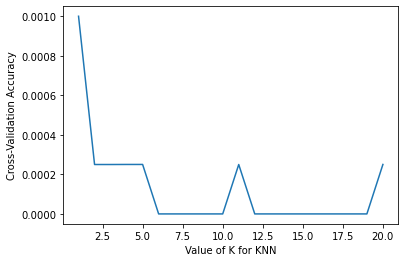

In [88]:
#Euclidean Distance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list = list(range(1,21))           # k를 1~20의 수로 고려
k_score = []                        

for k in tqdm(k_list) :
    knn = KNeighborsClassifier(n_neighbors=k, p=2) 
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring = 'accuracy')
    k_score.append(scores.mean())                  

plt.plot(k_list, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [89]:
#가장 좋은 k값 찾기
best_k = [k_list[i] for i in range(len(k_list)) if k_list[i] == np.max(k_list)]
print('Best k value :', best_k)

Best k value : [20]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:20<00:00,  1.05s/it]


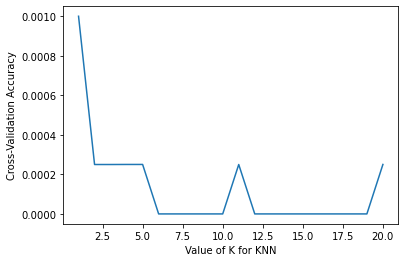

In [90]:
#Manhattan Distance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list = list(range(1,21))           # k를 1~20의 수로 고려
k_score = []                        

for k in tqdm(k_list) :
    knn = KNeighborsClassifier(n_neighbors=k, p=1) 
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring = 'accuracy')
    k_score.append(scores.mean())                  

plt.plot(k_list, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [91]:
#가장 좋은 k값 찾기
best_k = [k_list[i] for i in range(len(k_list)) if k_list[i] == np.max(k_list)]
print('Best k value :', best_k)

Best k value : [20]


#### 최종 모델 선정 및 성능 확인

In [93]:
from sklearn.metrics import accuracy_score

In [102]:
knn = KNeighborsClassifier(n_neighbors = 20, p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#정확도 기준
acc = accuracy_score(y_true = y_test, y_pred = y_pred) # 정확도

print(f"정확도:",acc)

정확도: 0.001


매우 낮은 정확도를 볼 수 있는데, 이는 설명변수의 범주가 너무 많아서 그런 것이라고 예상된다. train 상으로는 20에서 가장 좋은 정확도가 산출되었다.